## Deep Learning: Assignment 1: Perceptrons

In [2]:
# Write your information here!
student_name = 'Juuso Leppänen'
student_email = "AD1885@student.jamk.fi"

## Assignment 1-1
### Topic: Happiness, Classifier: Perceptron (3 p)

Check out the **Somerville Happiness Survey Data Set** at
[https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey](https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey).

Preprocess the data.
Note! the file is UTF-16 encoded, so you need to set encoding when reading.

In [4]:

# Note! Implementation code of preprocessing is already written in this assignment.
import pandas as pd

df = pd.read_csv('data/SomervilleHappinessSurvey2015.csv', encoding='utf-16')

feature_columns = [
     'info-availability',
     'cost-of-housing',
     'quality-public-schools',
     'trust-in-local-police',
     'maintenance-of-streets',
     'social-event-availability'
]

columns = ['happy'] + feature_columns

df.columns = columns
# Save the DataFrame to the df variable and the training data.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['happy', 'info-availability', 'cost-of-housing',
       'quality-public-schools', 'trust-in-local-police',
       'maintenance-of-streets', 'social-event-availability'],
      dtype='object')
First row by position: happy                        0
info-availability            3
cost-of-housing              3
quality-public-schools       3
trust-in-local-police        4
maintenance-of-streets       2
social-event-availability    4
Name: 0, dtype: int64


Split the dataset into training (67 %) and testing (33 %) (`X_train`, `y_train`, `X_test`, `y_test`) dataset.
Use random seed `9001`.

In [6]:
# TODO: Type your implementation in this cell.
# TODO: Split the dataset
from sklearn.model_selection import train_test_split

# split the dataset
X = df.drop(columns='happy')
Y = df["happy"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.33, random_state = 9001
)

In [7]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')

Test length: 48
Train length: 95


### Implement a linear perceptron classifier

1. Use the linear perceptron from `scikit-learn` library to create a classifier. Save the classifier in the `pc` variable.

2. Predict the probability of your test data being in the class using your classifier and save the confidence scores in the variable `y_score`.
   Save the result of the predicted classes in the variable `y_pred`. Hint: you can use `decision_function()` to calculate confidence scores.

3. Save the classification report `cr` and the confusion matrix `cm` using the `metrics` module.

4. Calculate the ROC values for the regression using the `metrics` module of the `scikit-learn` library.
   Calculate the area under the ROC curve variable `auc`. Plot the threshold optimization curve using the `matplotlib` library.

5. Write in the `reflection` variable thoughts of ROC curve and accuracy.

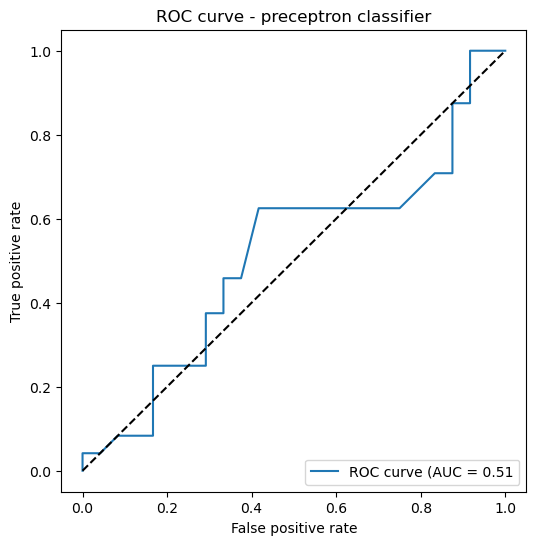

In [9]:
# TODO: Type your implementation in this cell.
from sklearn.linear_model import Perceptron
from sklearn import metrics
import matplotlib.pyplot as plt

# create Perceptron and train
pc = Perceptron(random_state = 9001)
pc.fit(X_train, Y_train)

# make predictions
y_pred = pc.predict(X_test)
y_score = pc.decision_function(X_test)

# evaluate metrics
cr = metrics.classification_report(Y_test, y_pred)
cm = metrics.confusion_matrix(Y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_score)
auc = metrics.auc(fpr, tpr)

# plot roc curve
plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, label = f"ROC curve (AUC = {auc:.2f}")
plt.plot([0,1], [0, 1], "k--")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve - preceptron classifier")
plt.legend(loc = "lower right")
plt.show()

In [10]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment.
print(f'Perceptron average test accuracy: {pc.score(X_test, Y_test)}')

Perceptron average test accuracy: 0.4583333333333333


In [11]:
# TODO: Type your implementation in this cell.

# TODO: Reflection - thoughts of ROC curve and accuracy.
reflection = "The ROC curve shows how well perceptron separates the happy and unhappy groups, high AUC = better performance. While accuracy gives overall success rate, ROC curve shows insight how the model balances true and false positives"

In [12]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment.

print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')
print(f'auc: {auc}')
print(f'Reflection: {reflection}')

# TODO: Visualize results also

Classification report:
               precision    recall  f1-score   support

           0       0.48      0.83      0.61        24
           1       0.33      0.08      0.13        24

    accuracy                           0.46        48
   macro avg       0.40      0.46      0.37        48
weighted avg       0.40      0.46      0.37        48

Confusion matrix:
 [[20  4]
 [22  2]]
auc: 0.5130208333333334
Reflection: The ROC curve shows how well perceptron separates the happy and unhappy groups, high AUC = better performance. While accuracy gives overall success rate, ROC curve shows insight how the model balances true and false positives


## Assignment 1-2
### Topic: Newsgroup messages with Perceptron (3 p)

Check out the following dataset:

* `sklearn.datasets.fetch_20newsgroups`

This data contains messages sent to 20 newsgroups. Data does not need to be pre-processed at all.
The following categories are used in the classification:
* `categories: ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']`
* `categories_2: ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']`

The dataset is already divided into test and train sets (`fetch_20newsgroups(subset)`).
Use the following variables with training and test sets (`X_train`, `y_train`, `X_test`, `y_test`).

Transform both training and test data with the methods of the `TfidfVectorizer` class.
* Scaling is not needed here after this
* You should print samples of the values to see if values are on the right scale: **0-1**.


In [14]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

# TODO: Set the name of the selectable test set (subset) and categories (categories)
ng_train = fetch_20newsgroups(
    subset='train',
    categories=categories,
    remove=('headers', 'footers', 'quotes')
)
ng_test = fetch_20newsgroups(
    subset='test',
    categories=categories,
    remove=('headers', 'footers', 'quotes')
)

Vectorizer = TfidfVectorizer()

# TODO: Transform the training data to numerical with the fit_transform() method
X_train = Vectorizer.fit_transform(ng_train.data)
# TODO: Transform the test data using a different method
X_test = Vectorizer.transform(ng_test.data)

print("TF-IDF sample values from training data:", X_train[0, :10].toarray())

TF-IDF sample values from training data: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


1. Use the linear perceptron from `scikit-learn` library to create a classifier.
   Save the classifier in the `pc` variable. Use random seed `12501`.

2. Predict the probability of your test data being in the class using your classifier and save the confidence scores in the variable `y_score`.
   Save the result of the predicted classes in the variable `y_pred`.

3. Save the classification report `cr` and the confusion matrix `cm` using the `metrics` module.

In [16]:
# TODO: Type your implementation in this cell.
pc = Perceptron(random_state=12501)
clf = Perceptron(random_state=12501)

pc.fit(X_train, ng_train.target)
clf.fit(X_train, ng_train.target)

# predictions
y_pred = pc.predict(X_test)
y_score = pc.decision_function(X_test)

# classification report and confusion matrix
cr = classification_report(ng_test.target, y_pred)
cm = confusion_matrix(ng_test.target, y_pred)

In [17]:
# Running the assignment's answers.
# Note! Do not edit this cell, just run it after you complete the assignment.

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {pc.score(X_test, ng_test.target)}')
print(cm) # compare the actual values with the predictions
print(cr)

Predict: [1 2 0 ... 0 2 0] and score: [[-0.21437599  0.43421675 -0.35453969]
 [-0.3811092  -0.11365841 -0.01741706]
 [ 0.13018903 -0.89340003 -0.43527784]
 ...
 [ 0.01711722 -0.07380962 -0.23293169]
 [-0.77755308 -0.6939603   0.59417642]
 [ 0.21410956 -0.09395535 -0.1688701 ]]
Perceptron average test accuracy: 0.8582214765100671
[[365  19  12]
 [ 42 310  45]
 [ 24  27 348]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       396
           1       0.87      0.78      0.82       397
           2       0.86      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Let's draw a picture of the confusion matrix.

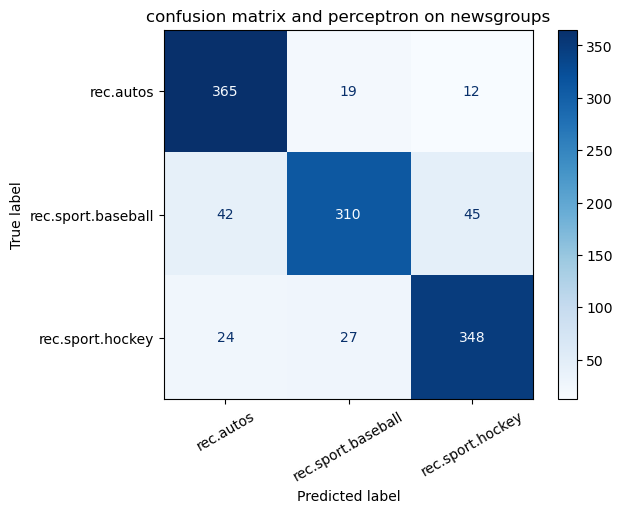

In [19]:
# TODO: plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ng_train.target_names)
disp.plot(cmap = "Blues", xticks_rotation = 30)
plt.title("confusion matrix and perceptron on newsgroups")
plt.show()

# Assignment 1-3) (2 p) Another newgroup classifier

Do the exactly same task as in _assignment 1-2_ by using another `categories_2` categories list.
* The obtained results are analyzed by comparing results with the results of _assignment 1-2_.

Reflection: Compare the learning results with the newsgroup data with each other.
Verbally reflect on what the possible differences in the results are due to.

In [23]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

categories_2 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

pc = Perceptron(random_state=12501)
clf = Perceptron(random_state=12501)
pc.fit(X_train, ng_train.target)
clf.fit(X_train, ng_train.target)

y_pred = pc.predict(X_test)
y_score = pc.decision_function(X_test)

# TODO: Set the name of the selectable test set (subset) and categories (categories)
ng_train = fetch_20newsgroups(
    subset='train',
    categories=categories_2,
    remove=('headers', 'footers', 'quotes')
)
ng_test = fetch_20newsgroups(
    subset='test',
    categories=categories_2,
    remove=('headers', 'footers', 'quotes')
)

Vectorizer = TfidfVectorizer()

# TODO: Transform the training data with the fit_transform() method
X_train = Vectorizer.fit_transform(ng_train.data)
# TODO: Transform the test data
X_test = Vectorizer.transform(ng_test.data)

In [24]:
# Running the assignment's answers.
# Note! Do not edit this cell, just run it after you complete the assignment.

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {clf.score(X_test, ng_test.target)}')
print(confusion_matrix(ng_test.target, y_pred))
print(classification_report(ng_test.target, y_pred))

Predict: [0 2 1 ... 0 1 1] and score: [[ 0.79084953 -0.54862678 -0.67818069]
 [-0.24036164 -0.5191811   0.02529202]
 [-0.27250296  0.18487685 -0.02065824]
 ...
 [ 0.38867009 -0.19169666 -0.59294443]
 [-0.68236023  0.88524358 -0.85308886]
 [-0.33076315  0.23788087 -0.61880495]]
Perceptron average test accuracy: 0.732597623089983
[[297  47  45]
 [ 73 292  29]
 [ 68  53 274]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       389
           1       0.74      0.74      0.74       394
           2       0.79      0.69      0.74       395

    accuracy                           0.73      1178
   macro avg       0.74      0.73      0.73      1178
weighted avg       0.74      0.73      0.73      1178



Let's draw a picture of the confusion matrix with `categories_2` data.

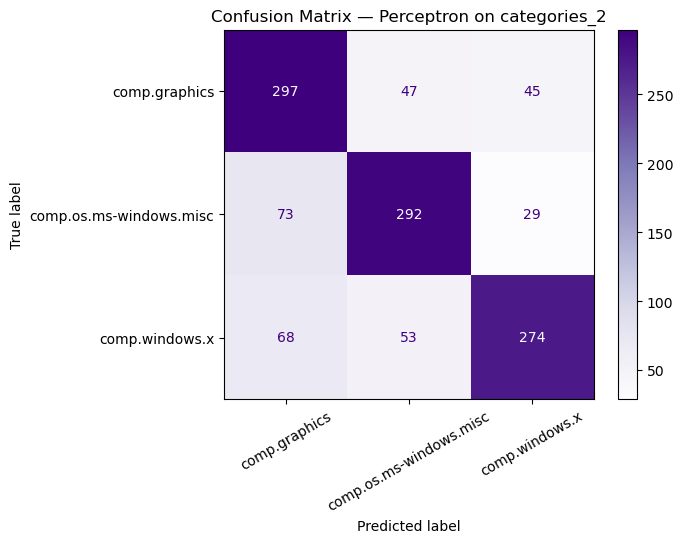

In [28]:
# TODO: Plot the confusion matrix
cm = confusion_matrix(ng_test.target, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ng_train.target_names)
disp.plot(cmap='Purples', xticks_rotation=30)
plt.title('Confusion Matrix — Perceptron on categories_2')
plt.show()